In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [188]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## TRAİN

In [189]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Hayatta kalan kadınların yüzdesi :  0.7420382165605095
Hayatta kalan erkeklerin yüzdesi :  0.18890814558058924


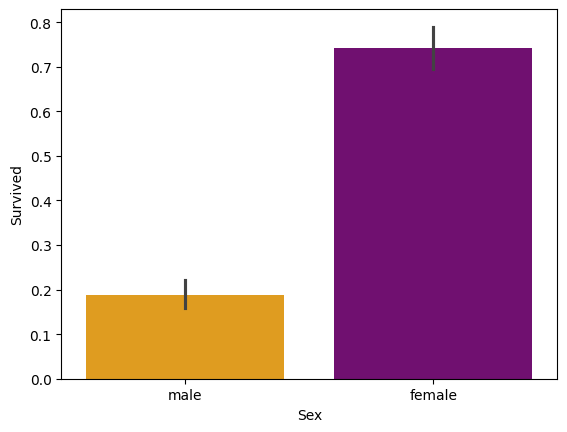

In [193]:
sns.barplot(data=train , x='Sex' , y='Survived' , palette=['orange' , 'purple'])

print('Hayatta kalan kadınların yüzdesi : ' , train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1])
print('Hayatta kalan erkeklerin yüzdesi : ' , train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1])

In [194]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass = 1 den hayatta kalanların yüzdesi : 0.6296296296296297
Pclass = 2 den hayatta kalanların yüzdesi : 87
Pclass = 3 den hayatta kalanların yüzdesi : 119


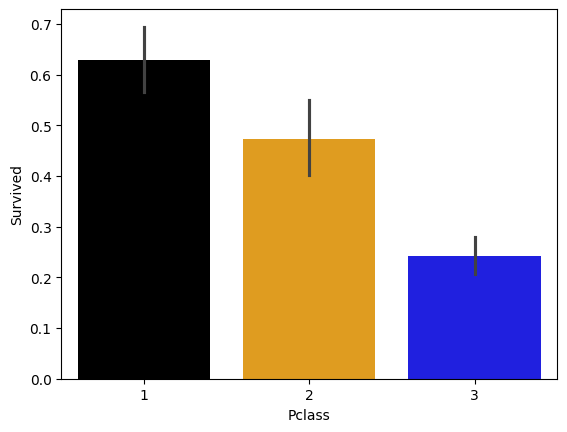

In [195]:
sns.barplot(data=train , x='Pclass' , y='Survived' , palette=['Black' , 'orange' , 'blue'])

print('Pclass = 1 den hayatta kalanların yüzdesi :' , train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1])
print('Pclass = 2 den hayatta kalanların yüzdesi :' , train['Survived'][train['Pclass'] == 2].value_counts()[1])
print('Pclass = 3 den hayatta kalanların yüzdesi :' , train['Survived'][train['Pclass'] == 3].value_counts()[1])

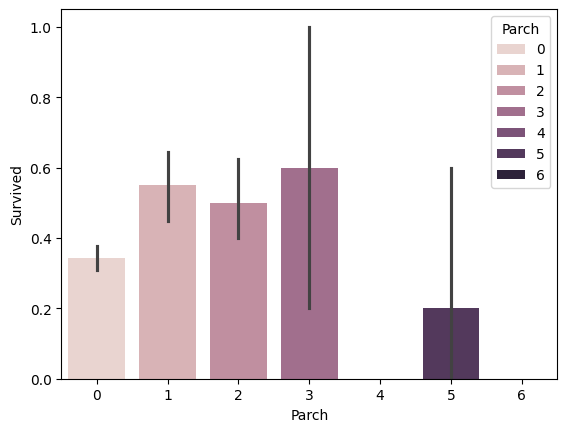

In [196]:
sns.barplot(data=train , x='Parch' , y='Survived' , hue='Parch')
plt.show()

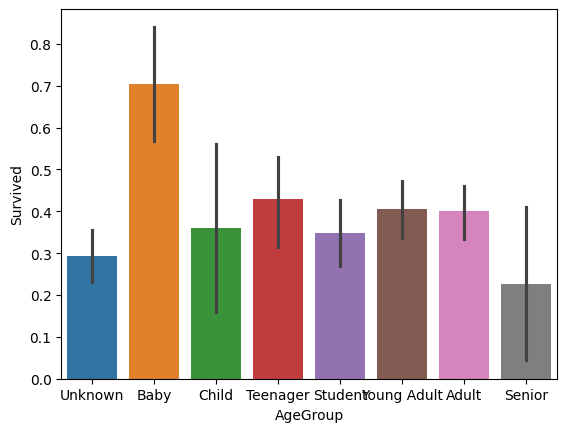

In [197]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'] , bins , labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins , labels=labels)

sns.barplot(data=train , x='AgeGroup' , y='Survived' , hue='AgeGroup')
plt.show()

CabinBool dan sağ kurtulanların yüzdesi : 66.66666666666666
CabinBool = 0 dan hayatta kalanların yüzdesi: 29.985443959243085


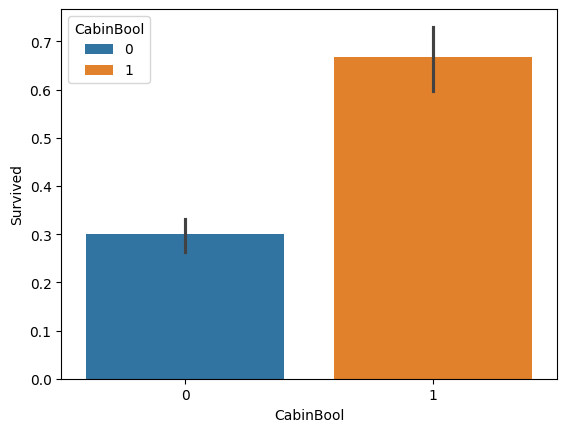

In [198]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

print('CabinBool dan sağ kurtulanların yüzdesi :' , train['Survived'][train['CabinBool'] == 1].value_counts(normalize=True)[1]*100)
print('CabinBool = 0 dan hayatta kalanların yüzdesi:' , train['Survived'][train['CabinBool'] == 0].value_counts(normalize=True)[1]*100)

sns.barplot(data=train , x='CabinBool' , y='Survived' , hue='CabinBool')
plt.show()

# TEST

In [199]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [200]:
train = train.drop(['Cabin'] , axis=1)
test = test.drop(['Cabin'], axis=1)

In [201]:
train = train.drop(['Ticket'] , axis=1)
test = test.drop(['Ticket'] , axis=1)

In [202]:
train[train['Embarked'] == "S"].shape[0]

644

In [203]:
print('Southampton dan gemiye binen kişi sayısı :')
southampton = train[train['Embarked'] == "S"].shape[0]
print(southampton)

print('Cherbourg dan gemiye binen kişi sayısı :')
cherbourg = train[train['Embarked'] == 'C'].shape[0]
print(cherbourg)

print('Queenstown dan gemiye binen kişi sayısı :')
queentown = train[train['Embarked'] == 'Q'].shape[0]
print(queentown)

Southampton dan gemiye binen kişi sayısı :
644
Cherbourg dan gemiye binen kişi sayısı :
168
Queenstown dan gemiye binen kişi sayısı :
77


In [204]:
train = train.fillna({"Embarked" : "S"})

In [205]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Student,0


In [206]:
combine = [train , test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.' , expand = False)

pd.crosstab(train['Title'] , train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Bu kısımda her yolcunun adından (örneğin "Braund, Mr. Owen Harris") unvan kısmını çekiyoruz.
Detaylı açıklama:

dataset.Name → Name sütunundaki tüm isimleri alır.

.str.extract(' ([A-Za-z]+)\.', expand=False) → her ismin içinde boşluk + harf dizisi + nokta (.) şeklinde geçen ifadeyi bulur.
🔍 Regex açıklaması:

*' ' : Boşluk karakteri arar.

*[A-Za-z]+ : Bir veya daha fazla harf (A–Z, a–z).

*\. : Nokta karakterini arar (regex’te . özel anlam taşıdığı için \ ile kaçırılır).

*expand=False : Çıkan sonucu DataFrame değil, Series olarak döndürür.

In [207]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] == dataset['Title'].replace(['Countess' , 'Lady' , 'Sir'] , 'Royal')
    dataset['Title'] == dataset['Title'].replace('Mlle' , 'Miss')
    dataset['Title'] == dataset['Title'].replace('Ms' , 'Miss')
    dataset['Title'] == dataset['Title'].replace('Mme' , 'Mrs')

train[['Title' , 'Survived']].groupby(['Title'] , as_index=False).mean()

,Title,Survived
0,Countess,1.000000
1,Master,0.575000
2,Miss,0.697802
3,Mlle,1.000000
4,Mme,1.000000
5,Mr,0.156673
6,Mrs,0.792000
7,Ms,1.000000
8,Rare,0.285714
9,Sir,1.000000


In [208]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

for dataset in combine:
    dataset['Title'] = dataset["Title"].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1.0


In [209]:
test['Title'][x]

np.float64(0.0)

In [210]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

KeyError: np.float64(0.0)

In [ ]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)
train.head()

train = train.drop(['Age'] , axis=1)
test = test.drop(['Age'] , axis=1)

In [ ]:
train = train.drop(['Name'] , axis=1)
test = test.drop(['Name'] , axis=1)

In [ ]:
sex_mapping = {'male': 0 , 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,NaN,0,1.0
1,2,1,1,1,1,0,71.2833,C,NaN,1,3.0
2,3,1,3,1,0,0,7.9250,S,NaN,0,2.0
3,4,1,1,1,1,0,53.1000,S,NaN,1,3.0
4,5,0,3,0,0,0,8.0500,S,NaN,0,1.0


In [ ]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,NaN,0,1.0
1,2,1,1,1,1,0,71.2833,2,NaN,1,3.0
2,3,1,3,1,0,0,7.9250,1,NaN,0,2.0
3,4,1,1,1,1,0,53.1000,1,NaN,1,3.0
4,5,0,3,0,0,0,8.0500,1,NaN,0,1.0


In [ ]:
test['Pclass'][x]

np.int64(3)

In [ ]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        

train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,1,3.0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,0,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,1,3.0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,0,1.0,2


# Choosing the best MODEL

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    int64   
 10  AgeGroup     891 non-null    category
 11  CabinBool    891 non-null    int64   
 12  Title        891 non-null    float64 
dtypes: category(1), float64(3), int64(8), object(1)
memory usage: 84.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])
train['Embarked'] = encoder.fit_transform(train['Embarked'])
train['AgeGroup'] = encoder.fit_transform(train['AgeGroup'])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId', 'Name'], axis=1)
target = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.22, random_state=0)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train , y_train)
y_pred = gaussian.predict(X_test)

acc_gaussian = round(accuracy_score(y_pred , y_test) * 100  , 2)
print('GaussianNB Model doğruluk oranı : ' , acc_gaussian  ,  "%")

GaussianNB Model doğruluk oranı :  76.65 %


In [ ]:
from sklearn.linear_model import  LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred , y_test)* 100 , 2)
print('LogisticRegression Model doğruluk oranı : ' ,  acc_logreg ,  "%")


LogisticRegression Model doğruluk oranı :  80.71 %


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred , y_test) * 100 , 2)
print(' SVC Model doğruluk oranı : ' , acc_svc  ,  "%")

 SVC Model doğruluk oranı :  71.57 %


In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train , y_train)
y_pred = linear_svc.predict(X_test)
acc_svm = round(accuracy_score(y_pred , y_test) * 100 , 2)
print('SVM Model doğruluk oranı : ' , acc_svm ,  "%")


SVM Model doğruluk oranı :  78.68 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train , y_train)
y_pred = dec_tree.predict(X_test)
acc_dectree = round(accuracy_score(y_pred , y_test) * 100 , 2)
print('DecisionTreeClassifier Model doğruluk oranı : ' , acc_dectree ,"%")

DecisionTreeClassifier Model doğruluk oranı :  79.7 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train , y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred , y_test) *100 , 2)
print(' RandomForestClassifier Model doğruluk oranı : ' , acc_randomforest ,  "%")

 RandomForestClassifier Model doğruluk oranı :  83.76 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred , y_test) * 100 , 2)
print(' KNeighborsClassifier Model doğruluk oranı : ' , acc_knn  ,"%")

 KNeighborsClassifier Model doğruluk oranı :  74.11 %


In [ ]:
'Naive Bayes' LogisticRegression  , svc , LinearSVC , DecisionTreeClassifier , RandomForestClassifier , KNeighborsClassifier

# RESULT

In [ ]:
models = pd.DataFrame({
    'Model' : ['Naive Bayes' , 'Logistic Regression' , 'SVC' , 'Linear SVC' , 'DecisionTreeClassifier' , 'RandomForestClassifier' , 'KNeighborsClassifier'],
    'Score' : [acc_gaussian , acc_logreg , acc_svc , acc_svm , acc_dectree , acc_randomforest , acc_knn]
})
models.sort_values(by='Score' , ascending=False)

,Model,Score
5,RandomForestClassifier,83.76
1,Logistic Regression,80.71
4,DecisionTreeClassifier,79.70
3,Linear SVC,78.68
0,Naive Bayes,76.65
6,KNeighborsClassifier,74.11
2,SVC,71.57
